# Create a benchmark with LFR

In [1]:
# !pip install igraph

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig

In [3]:
from networkx.generators.community import LFR_benchmark_graph
nodes = 210
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(
    nodes, tau1, tau2, mu, average_degree=5, min_community=22, seed=10)
n = 100

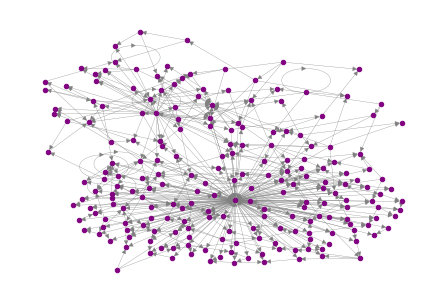

In [4]:
nx.draw(G,edge_color = 'gray', node_color='purple',arrows = True, node_size = 20, width = 0.3)

# Clauset-Newman-Moore Greedy Algorithm

In [5]:
G_CNM = G.copy()

In [6]:
import timeit
time_CNM = timeit.timeit("nx.algorithms.community.greedy_modularity_communities(G_CNM, weight=None, resolution=1)", setup="from __main__ import nx, G_CNM", number=n)/n

communities_CNM = nx.algorithms.community.greedy_modularity_communities(G_CNM, weight=None, resolution=1)

In [7]:
#Number of communities
noc_CMN = len(communities_CNM)

In [8]:
type(communities_CNM)
# communities_CNM

list

In [9]:
modularity_CNM = nx.algorithms.community.quality.modularity(G_CNM,communities_CNM)
modularity_CNM

0.45251145356101624

In [10]:
import random
com_color = { i : (random.random(), random.random(), random.random()) for i in communities_CNM }

In [11]:
node_color = dict.fromkeys(G_CNM.nodes())
node_com = dict.fromkeys(G_CNM.nodes())
i = 0
for c in communities_CNM:
    for node in c:
        node_color[node]= com_color[c]
        node_com[node] = i
    i+=1

color_values = [node_color.get(node, (random.random(), random.random(), random.random())) for node in G_CNM.nodes()]

In [12]:
## removing inter-community edges
# for edge in G.edges:
#     if(node_com[edge[0]]!= node_com[edge[1]]):
#         G.remove_edge(edge[0], edge[1])

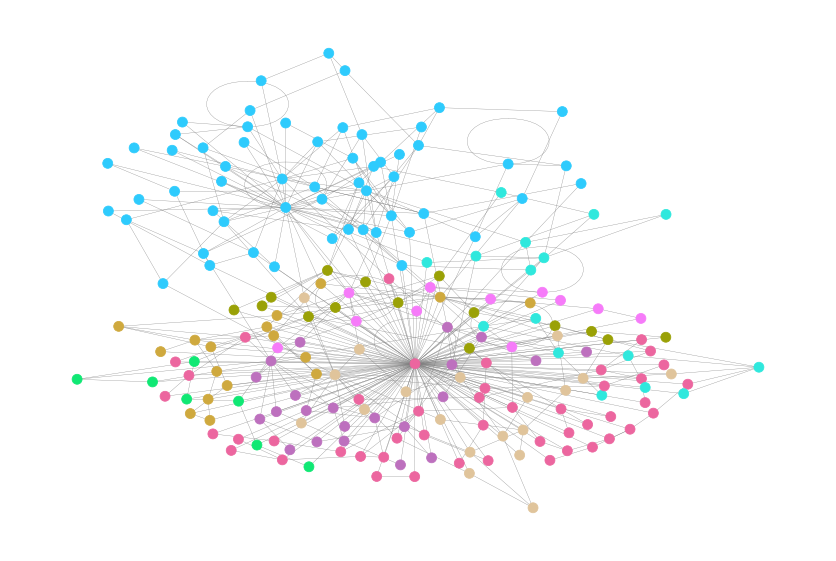

In [13]:
fig = plt.figure(1, figsize=(15, 10), dpi=55)
nx.draw_spring(G_CNM,edge_color = 'gray',node_color=color_values,arrows = False, node_size = 170, with_labels=False,font_size = 8, width = 0.4)
plt.show()

# Louvain algorithm

In [14]:
G_Louvain = G.copy()

In [15]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [16]:
# Extract the weighted adjacency
W = np.array(nx.to_numpy_matrix(G_Louvain, weight='weight'))
W[W==1] = 1.5

In [17]:
from community import community_louvain
G_Louvain = nx.from_numpy_array(W)
import timeit
time_Louvain = timeit.timeit("community_louvain.best_partition(G_Louvain,weight='weight')", setup="from __main__ import community_louvain, G_Louvain", number=n)/n
partition_Louvain = community_louvain.best_partition(G_Louvain,weight='weight')

In [18]:
noc_Louvain = len(set(partition_Louvain.values()))

In [19]:
type(partition_Louvain)

dict

In [20]:
modularity_Louvain = community_louvain.modularity(partition_Louvain, G_Louvain, weight='weight')
print("The modularity Q based on networkx is {}".format(modularity_Louvain))

The modularity Q based on networkx is 0.4476655560183257


In [21]:
import random
#drawing
size = len(set(partition_Louvain.values()))
com_color = { i : (random.random(), random.random(), random.random()) for i in range(0,size) }

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

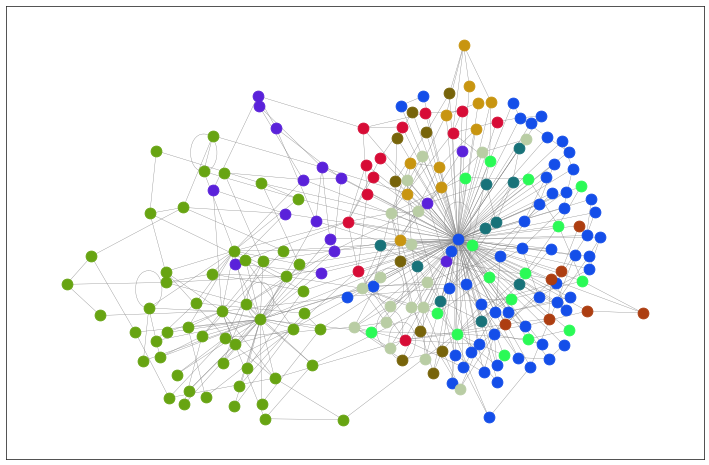

In [22]:
pos = nx.spring_layout(G_Louvain)
fig = plt.figure(figsize=(15, 10), dpi=60)

count = 0
for com in set(partition_Louvain.values()) :
    com_nodes = [nodes for nodes in partition_Louvain.keys() if partition_Louvain[nodes] == com]
    nx.draw_networkx_nodes(G_Louvain, pos, com_nodes, node_size = 170, node_color = com_color[count])
    count = count + 1.

nx.draw_networkx_edges(G_Louvain,pos, width=0.4, edge_color='gray')
plt.show()

# Leiden

In [23]:
!pip install --upgrade pip setuptools wheel

In [24]:
! pip install --upgrade pip

In [25]:
! pip install igraph cairocffi pycairo

  Using cached cairocffi-1.3.0-py3-none-any.whl
  Using cached pycairo-1.20.1.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects


In [26]:
! pip install --upgrade networkx

In [27]:
G_Leiden = G.copy()

In [28]:
import leidenalg as la
import igraph as ig

In [29]:
G_Leiden = ig.Graph.from_networkx(G_Leiden)

In [30]:
import timeit
time_Leiden = timeit.timeit("la.find_partition(G_Leiden, la.ModularityVertexPartition)", setup="from __main__ import la, G_Leiden", number=n)/n
time_Leiden

0.0015809622999995554

In [31]:
partition_Leiden = la.find_partition(G_Leiden, la.ModularityVertexPartition)

In [32]:
noc_Leiden = len(partition_Leiden.subgraphs())

In [33]:
! pip install pycairo

  Using cached pycairo-1.20.1.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects


In [34]:
ig.plot(partition_Leiden,bbox=(500,300),vertex_size=7)

AttributeError: ignored

In [35]:
modularity_Leiden = partition_Leiden.modularity
print("The modularity Q based on networkx is {}".format(modularity_Leiden))

The modularity Q based on networkx is 0.4623115368596418


# Markov Clustering Algorithm

In [36]:
G_MC = G.copy()

In [37]:
! pip install cdlib

In [38]:
from cdlib import algorithms
import timeit
time_MC = timeit.timeit("algorithms.markov_clustering(G_MC)", setup="from __main__ import algorithms, G_MC", number=n)/n

In [39]:
communities_MC = algorithms.markov_clustering(G_MC)

In [40]:
communities_MC

In [41]:
time_MC

0.09108441478000259

In [42]:
modularity_MC = communities_MC.link_modularity().score
print("The modularity is {}".format(modularity_MC))

The modularity is 0.11980937769719895


In [43]:
communities_MC = communities_MC.to_node_community_map() 
# communities_MC

In [44]:
# com = 1
# for node in communities_MC.keys():
#   print("node {}".format(node))
#   print("CMC[N] {}".format(communities_MC[node][0]))
#   if communities_MC[node][0] == com:
#     print('------------------------------------------------{}'.format(node))


In [45]:
com_MC_list= list(communities_MC.values())
for i in range(0,len(com_MC_list)):
  com_MC_list[i] = com_MC_list[i][0]
# com_MC_list

In [46]:
import random,numpy
noc_MC = com_MC_list[-1]
com_color = { i : numpy.array([random.random(), random.random(), random.random()]).reshape(1,-1) for i in range(0,noc_MC+1) }
com_color

{0: array([[0.42728059, 0.53094621, 0.732159  ]]),
 1: array([[0.49924605, 0.75196623, 0.45702168]]),
 2: array([[0.88088923, 0.0202308 , 0.22754221]]),
 3: array([[0.15702658, 0.98746014, 0.13783941]]),
 4: array([[0.21396809, 0.25324492, 0.83850307]]),
 5: array([[0.78670423, 0.96236404, 0.38936943]]),
 6: array([[0.30185828, 0.8706187 , 0.9397773 ]]),
 7: array([[0.46710643, 0.2403996 , 0.97688847]])}

In [47]:
noc_MC

7

In [48]:
# !pip install --upgrade graphviz

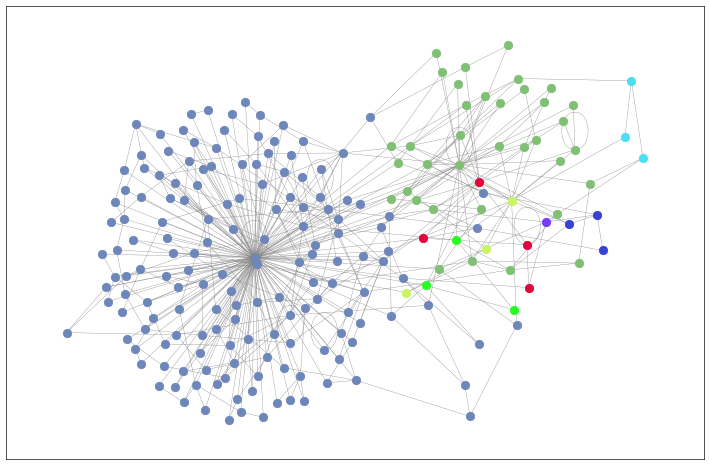

In [49]:
pos = nx.spring_layout(G_MC)
fig = plt.figure(figsize=(15, 10), dpi=60)

count = 0
for com in range(0,noc_MC+1):
    # print(com)
    com_nodes = [node for node in communities_MC.keys() if communities_MC[node][0] == com]
    # print(com_nodes)
    nx.draw_networkx_nodes(G_MC, pos, com_nodes, node_size = 100, node_color = com_color[count])
    count = count + 1

nx.draw_networkx_edges(G_MC,pos, width=0.4, edge_color='gray')
plt.show()

#Fluid Algorithm

In [50]:
G_Fluid = G.copy()
G_Fluid.size()

490

In [51]:
import networkx.algorithms.community.asyn_fluid as async_fluid

In [52]:
noc_average = (noc_CMN+noc_Leiden+noc_Louvain+noc_MC)/4
noc_average = int(noc_average)
noc_average

8

In [53]:
import timeit
time_Fluid = timeit.timeit("async_fluid.asyn_fluidc(G_Fluid, noc_average)", setup="from __main__ import async_fluid, G_Fluid, noc_average", number=n)/n
time_Fluid

0.016791988039999525

In [73]:
communities_Fluid = async_fluid.asyn_fluidc(G_Fluid, noc_average)
noc_Fluid = 0
com_fluid_set = []
for com in communities_Fluid:
  noc_Fluid += 1
  print(com)
  com_fluid_set.append(com)


{0, 5, 134, 10, 21, 32, 39, 45, 173, 181, 53, 187, 59, 195, 199, 74, 206, 81, 104, 111, 121}
{135, 136, 9, 140, 13, 15, 154, 155, 28, 38, 166, 41, 170, 46, 49, 180, 58, 190, 65, 66, 67, 72, 77, 90, 101, 102, 109, 123, 124}
{128, 4, 6, 7, 8, 16, 146, 20, 22, 29, 31, 33, 37, 44, 48, 177, 50, 55, 61, 70, 198, 203, 207, 79, 84, 85, 126, 127}
{129, 3, 14, 17, 40, 47, 51, 52, 183, 184, 186, 189, 82, 83, 89, 91, 107, 115, 120}
{1, 69, 201, 11, 75, 110, 175, 143, 78, 156, 116, 157, 23, 24, 92, 63, 30, 159}
{137, 12, 18, 19, 25, 158, 35, 164, 163, 165, 168, 169, 174, 179, 185, 188, 62, 191, 192, 194, 68, 208, 80, 87, 88, 100, 114}
{132, 148, 149, 151, 152, 26, 162, 34, 36, 42, 43, 172, 182, 200, 202, 76, 86, 93, 94, 97, 112, 113, 122}
{130, 131, 2, 133, 138, 139, 141, 142, 144, 145, 147, 150, 153, 27, 160, 161, 167, 171, 176, 178, 54, 56, 57, 60, 64, 193, 196, 197, 71, 73, 204, 205, 209, 95, 96, 98, 99, 103, 105, 106, 108, 117, 118, 119, 125}


In [74]:
for com in communities_Fluid:
  print(com)

In [75]:
import random
com_color = { i : numpy.array([random.random(), random.random(), random.random()]).reshape(1,-1) for i in range(0,noc_Fluid) }

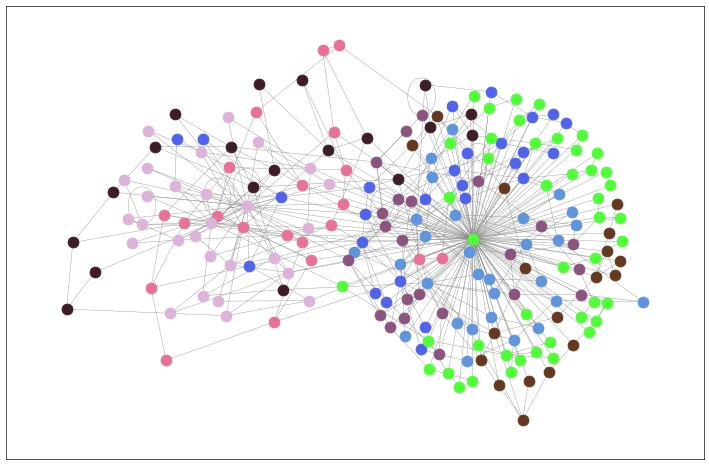

In [76]:
pos = nx.spring_layout(G_Fluid)
fig = plt.figure(figsize=(15, 10), dpi=60)

i = 0
for com in com_fluid_set :
    nx.draw_networkx_nodes(G_Fluid, pos, com, node_size = 170, node_color = com_color[i])
    i = i + 1.

nx.draw_networkx_edges(G_Fluid,pos, width=0.4, edge_color='gray')
plt.show()

In [77]:
for com in communities_Fluid:
  print(com)

In [78]:
try:
  modularity_Fluid = nx.algorithms.community.quality.modularity(G= G_Fluid, communities= communities_Fluid)
except:
  print("This partition is not valid")
  modularity_Fluid = 0
# modularity_Fluid

This partition is not valid


#Results

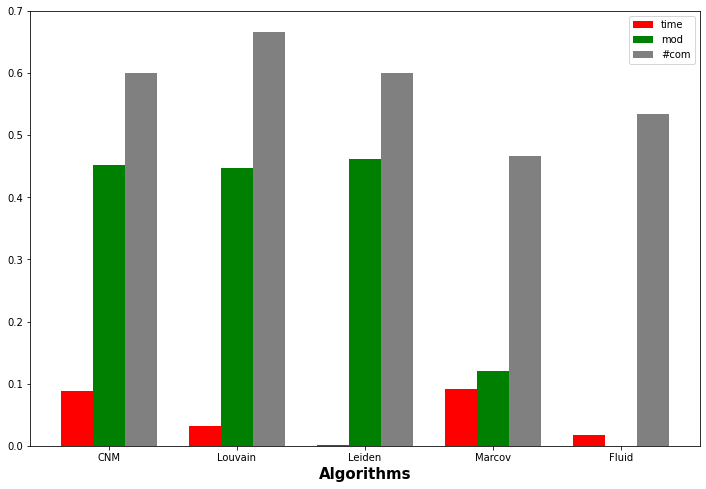

In [79]:
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
x = ['CNM','Louvain','Leiden','MC', 'Fluid']

time = [time_CNM, time_Louvain, time_Leiden, time_MC, time_Fluid]
# plt.bar(height=time,x=x,color='green')
modularity = [modularity_CNM,modularity_Louvain, modularity_Leiden,modularity_MC, modularity_Fluid]
# plt.bar(height=modularity, x=x)
k = 15
noc = [noc_CMN/k,noc_Louvain/k,noc_Leiden/k,noc_MC/k,noc_Fluid/k]

# Set position of bar on X axis
br1 = np.arange(len(time))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, time, color ='r', width = barWidth, label ='time')
plt.bar(br2, modularity, color ='g', width = barWidth, label ='mod')
plt.bar(br3, noc, color ='grey', width = barWidth, label ='#com')

plt.xticks([r + barWidth for r in range(len(time))],
        ['CNM','Louvain','Leiden','Marcov', 'Fluid'])
 
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 15)

plt.legend()

plt.show()